<a href="https://colab.research.google.com/github/AndrewKruszka/NeuralMachineLearning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression Overview**

This tutorial will walk the user through the steps to complete logistic regression

We'll first start by defining the required variables and functions needed.

Below is the sigmoid function, used to compress the output values to between 0 and 1

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def sigmoid(z):
  return 1 / (1 + np.exp(-z))



Next we define the cost function, which uses the sigmoid function when walking through gradient descent

In [44]:
def cost_function(X, y, theta):
  m = len(y)
  h = sigmoid(X @ theta)
  cost = (-1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
  return cost

Then we'll define the gradient descent algorithm that will find the optimized input values for the line separating the two classes

In [45]:
def gradient_descent(X, y, theta, alpha, iterations):
  m = len(y)
  cost_history = []
  for _ in range(iterations):
    h = sigmoid(X @ theta)
    gradient = (1/m) * X.T @ (h - y)
    theta -= alpha * gradient
    cost_history.append(cost_function(X, y, theta))
  return theta, cost_history

Finally, we'll define a prediction function that displays the actual prediction of input data based on the threshold defined by gradient descent

In [46]:
def predict(X, theta):
  z = X @ theta
  predictions = sigmoid(z)
  return (predictions >= 0.5).astype(int)

**Prepare Data**

For this tutorial, we'll use scikit-learn to populate data for training and testing

In [47]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

X = np.c_[np.ones(X.shape[0]), X]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

**Train the Model**

Now that we have data, we will start with two initial points and run gradient descent 100,000 times to find the best threshold for the classes. The more iterations of gradient descent used, the better-fit the line will be.

In [48]:
theta = np.zeros(X.shape[1])
alpha = 0.01
iterations = 100000

theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)

**Model Visualization**

Below is the completed model

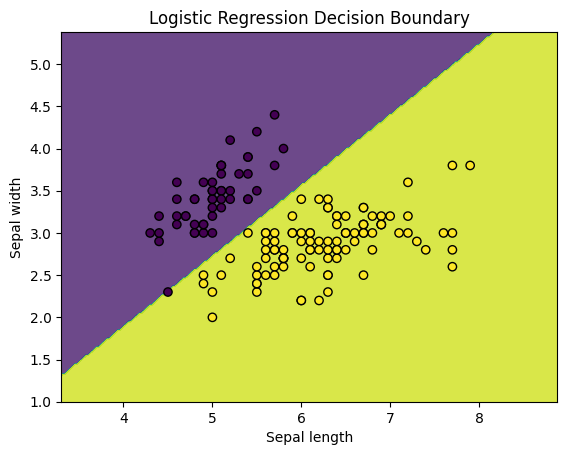

In [49]:
# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the meshgrid
Z = predict(np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()], theta)
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 1], X[:, 2], c=y, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Logistic Regression Decision Boundary')
plt.show()